In [1]:
#!/usr/bin/env python
"""
--------------------------------------------------------------------------
Created December 10, 2022 for TRIPs-Py library
"""
__authors__ = "Mirjeta Pasha and Connor Sanderford"
__copyright__ = "Copyright 2022, TRIPs-Py library"
__license__ = "GPL"
__version__ = "0.1"
__maintainer__ = "Mirjeta Pasha and Connor Sanderford"
__email__ = "mirjeta.pasha@tufts.edu; mirjeta.pasha1@gmail.com and csanderf@asu.edu; connorsanderford@gmail.com"

In [2]:
from trips.solvers.tSVD import *
from trips.testProblems import Deblurring, Tomography
import matplotlib.pyplot as plt
from trips.helpers import *

##### Illustrate the ill-posedness of some inverse problem examples and show the need for regularization
<p>In this example we illustrate the following:

Step 1: Generate a small deblurring example

In [3]:
# Tomography test problem
sizex = 64
sizey = 64
views = 60
Tomo = Tomography(sizex = sizex, sizey = sizey, views = views)
# To generate a small scale problem, set generate_matrix = True, otherwise generate_matrix = False
generate_matrix = True
if generate_matrix == True:
        A = Tomo.forward_Op_mat(sizex, sizey)
else:
        A = Tomo.forward_Op(sizex, sizey)
testproblem = 'ppower'
x_true = Tomo.generate_true(test_problem = testproblem)
shape = (np.int0(np.sqrt(x_true.shape[0])), np.int0(np.sqrt(x_true.shape[0])))
b_true = Tomo.generate_data(x_true, 1, 'no_given_operator', 60)
(b, delta) = Tomo.add_noise(b_true, 'Gaussian', noise_level= 0.01)
Tomo.plot_data(b)
Tomo.plot_rec(x_true.reshape((shape), order = 'F'), save_imgs = False, save_path='./saveImagesTomography'+'rec')

TypeError: forward_Op_mat() missing 1 required positional argument: 'views'

##### Compute the SVD of the operartor $A$ and plot the singlar values
###### If the parameter is 'A' then we give the full operator to the function plot_singular_values_svd. The SVD is then computed and the singlar values are plotted. If the parameter is 'S' then we have precomputed the SVD from which we have S and the function plot_singular_values_svd will only plot the singular values.

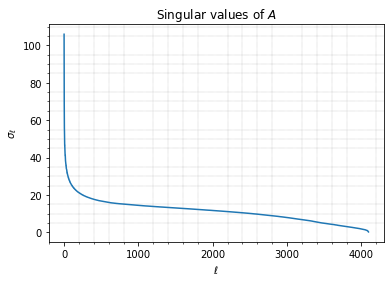

In [12]:
plot_singular_values_svd(Operator = A.todense(), parameter = 'A')

#### Compute the truncated SVD solution of a problem by specifying how many singular values you want to keep after truncation

In [14]:
truncated_value = 10
b_vec = b.reshape((-1,1))
x_tsvd = TruncatedSVD_sol(A.todense(), truncated_value, b_vec)
plt.imshow(x_tsvd.reshape((imagesize_x, imagesize_y)))
plt.axis('off')

NameError: name 'imagesize_x' is not defined

(-0.5, 63.5, 63.5, -0.5)

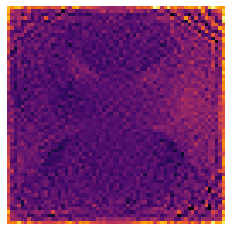

In [18]:
truncated_value = 3000
b_vec = b.reshape((-1,1))
x_tsvd = TruncatedSVD_sol(A.todense(), truncated_value, b_vec)
plt.imshow(x_tsvd.reshape((imagesize_x, imagesize_y)))
plt.axis('off')